In [41]:
from HistoricDataExtractor import HistoricData
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; 
import numpy as np
import datetime as dt
sns.set()

,Date,PClose,Open,High,Low,Close
0,2019-01-01,88.15,88.45,89.25,87.20,88.90
1,2019-01-02,88.90,89.20,91.40,88.60,89.60
2,2019-01-03,89.60,89.30,91.15,88.25,88.90
3,2019-01-04,88.90,88.75,90.95,87.55,88.65
4,2019-01-07,88.65,89.75,90.10,87.55,87.95
5,2019-01-08,87.95,88.25,90.10,87.85,88.75
6,2019-01-09,88.75,89.45,91.40,89.05,90.65
7,2019-01-10,90.65,90.80,93.25,90.00,92.70
8,2019-01-11,92.70,93.20,93.95,91.35,92.15
9,2019-01-14,92.15,91.60,92.00,88.40,88.75


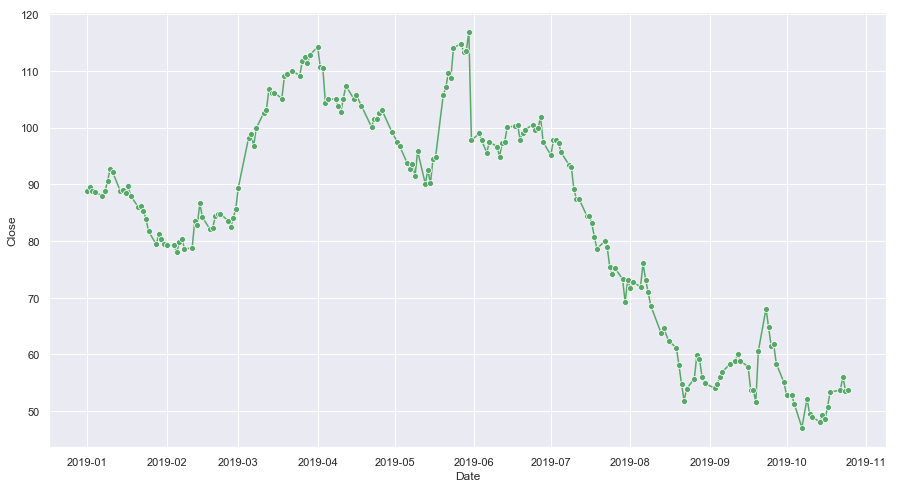

In [76]:
df = HistoricData("2019-01-01","2019-10-26").stockData('NCC')
plt.figure(figsize=(15,8))
sns.lineplot(x="Date", y="Close", data=df,marker='o', color='g')
df

In [89]:
date = pd.to_datetime(df['Date']).map(dt.datetime.toordinal)
close = df['Close'].values;
dateMatrix = np.transpose(np.matrix(date))
trainX,testX,trainy,testy =train_test_split(dateMatrix,close);
reg = LinearRegression().fit(trainX,trainy);

reg.score(dateMatrix,close)





0.41100272637244784